In [2]:
# importing the necessary libraries for classicication

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputRegressor

In [3]:
#importing file
loan=pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv')

In [4]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This dataset includes details of applicants who have applied for loan.
The dataset includes details like credit history, loan amount, their income, dependents etc. 

In [5]:
loan.head

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

This is first 5 rows and columns of the given dataset.

In [6]:
loan.tail

<bound method NDFrame.tail of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

This is the last 5 rows and columns of the dataset.

In [7]:
loan.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

#This are all the name of the 13 columns of the given dataset

In [8]:
loan.shape

(614, 13)

This dataset contains 614 rows and 13 coloumns out of which one is our target variable and rest are independent variables

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#In this we can see the total number of rows and columns and there are null values present in the dataset.
8 columns are object dtype as the columns contains categorical values and there is only one int64, and 4 float64 dtype column..

In [10]:
loan.nunique().to_frame('No of unique values')

,No of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


unique values of all the columns.

In [11]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

This are the missing values of the columns.
gender has 13 missing values,Dependents 15, self-employed 32, LoanAmount 22 Loan_Amount_Term 14
and Credit_History has 50 missing values.

<Axes: >

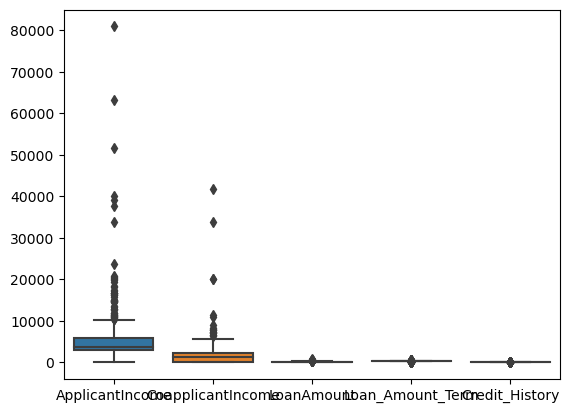

In [12]:
#dropping of duplicates values
loan.drop_duplicates(inplace=True)
sns.boxplot(loan)

In [13]:
loan.duplicated().sum()

0

We can see that there are no dublicate values in the dataset.

In [14]:
#dropping all null values
loan=loan.dropna()

In [15]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


After dropping the null values there are 480 rows and 13 columns.Before there was 614 rows and 13 columns.

In [16]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


#This shows the statistical information of the numericalcolumns. It has no negative values from the above abservation we can say that-

The count of all columns are same that means it has no missing values.
The mean value is greater than median(50%) in most of the columns, which means data is skewed to the right.
There is huge difference between the max and 75% so there are outliers present in the data.
The standard deviation,25% percentile value and min can be notice by this describe method.

<Axes: >

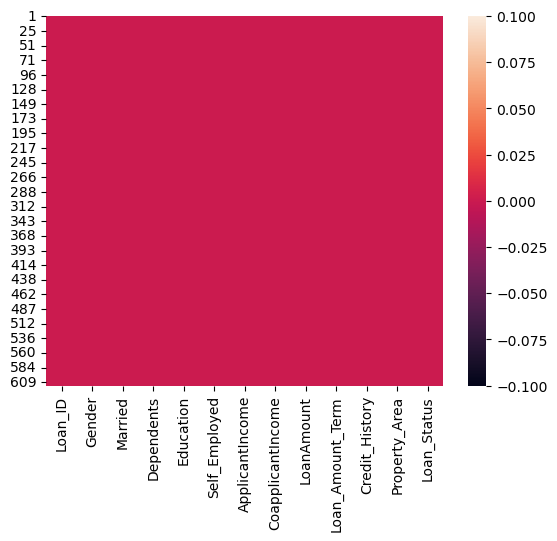

In [17]:
sns.heatmap(loan.isnull())

Visualizating null value data through heat map.It shows that there are no null values.

In [18]:
#cheacking the correlation
loan.corr

<bound method DataFrame.corr of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583          

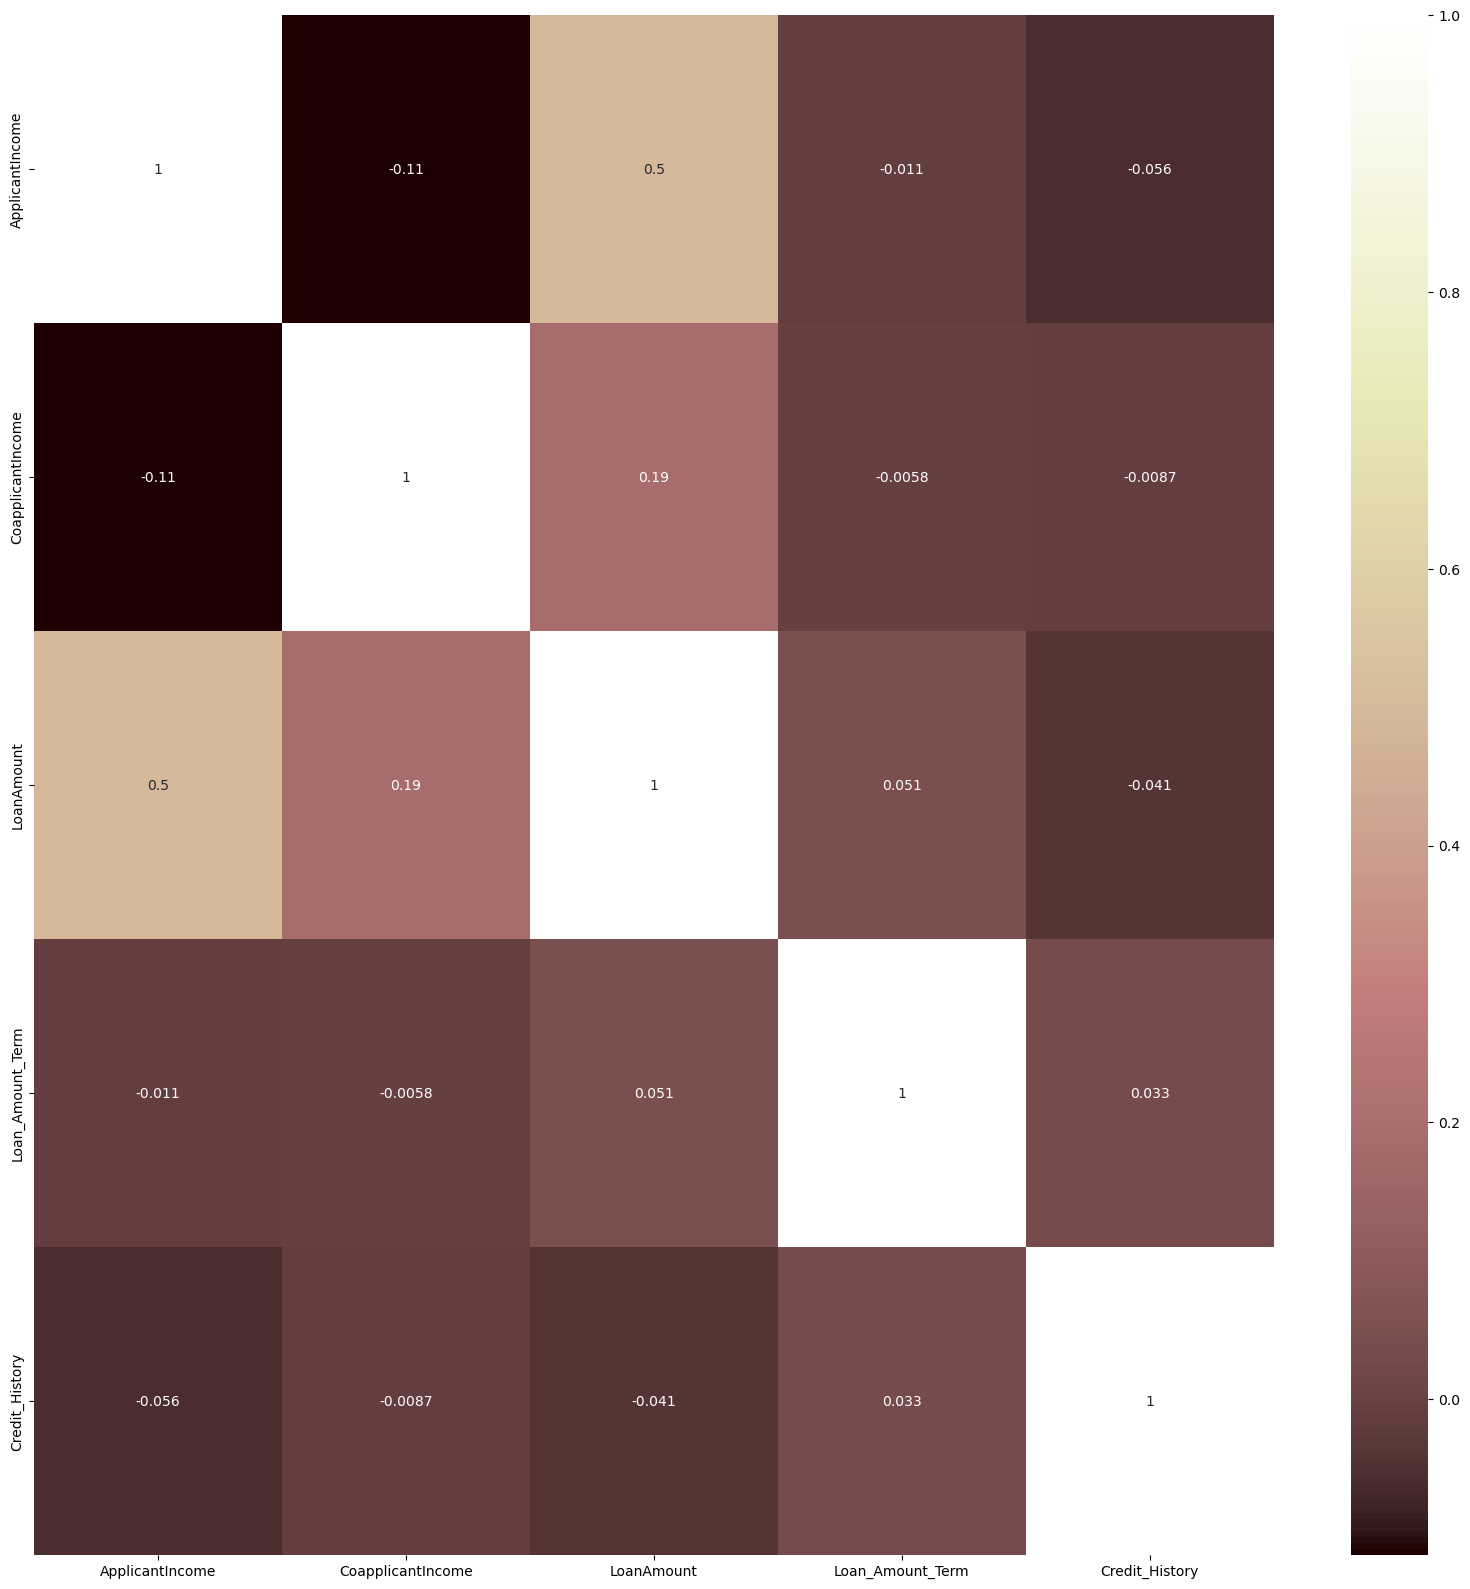

In [19]:
#checking of correlation with the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(loan.corr(),cmap='pink',annot=True)
plt.show()

#the light shades shows the positive correlation and dark shade shows negative correlation.

1.'property_area' has 'strong negative' correlation with loan amount.
2. where as 'credit history' and 'loan status'is positively correlated. 
3.'loan amount' and 'coapplicantincome' has positive correlation.
4.'coaplicantincome' and 'applicantincome' area has negative correlation.

In [20]:
#converting categorical data into numerical data
enc=OrdinalEncoder()
loan[['Property_Area','Loan_Status','Self_Employed','Loan_ID','Dependents']]=enc.fit_transform(loan[['Property_Area','Loan_Status','Self_Employed','Loan_ID','Dependents']])

In [21]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,Male,Yes,1.0,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,Male,Yes,0.0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,2.0,Male,Yes,0.0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,3.0,Male,No,0.0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
5,4.0,Male,Yes,2.0,Graduate,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,475.0,Female,No,0.0,Graduate,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,476.0,Male,Yes,3.0,Graduate,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,477.0,Male,Yes,1.0,Graduate,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,478.0,Male,Yes,2.0,Graduate,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [22]:
# dropping the columns
loan.drop(['Gender'],axis=1,inplace=True)
loan.drop(['Married'],axis=1,inplace=True)
loan.drop(['Education'],axis=1,inplace=True)

In [23]:
#changing the dtype into float
loan['Loan_ID']=loan['Loan_ID'].astype(float)
loan['ApplicantIncome']=loan['ApplicantIncome'].astype(float)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    float64
 1   Dependents         480 non-null    float64
 2   Self_Employed      480 non-null    float64
 3   ApplicantIncome    480 non-null    float64
 4   CoapplicantIncome  480 non-null    float64
 5   LoanAmount         480 non-null    float64
 6   Loan_Amount_Term   480 non-null    float64
 7   Credit_History     480 non-null    float64
 8   Property_Area      480 non-null    float64
 9   Loan_Status        480 non-null    float64
dtypes: float64(10)
memory usage: 41.2 KB


In [24]:
loan

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,2.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,3.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0
5,4.0,2.0,1.0,5417.0,4196.0,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
609,475.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1.0
610,476.0,3.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1.0
611,477.0,1.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0,1.0
612,478.0,2.0,0.0,7583.0,0.0,187.0,360.0,1.0,2.0,1.0


After changing the columns into categorical columns.

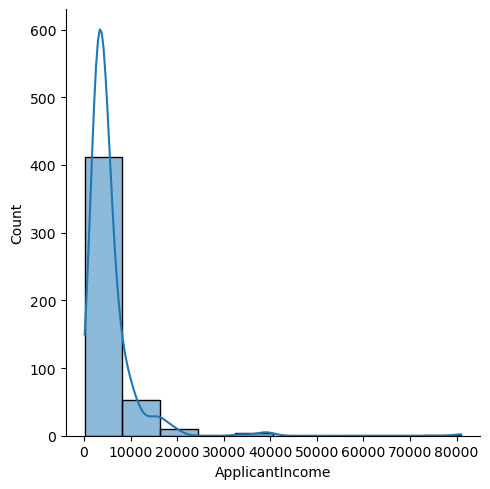

In [25]:
#CGPA of students
sns.displot(loan['ApplicantIncome'],bins=10,kde=True)

From 0 to 9000 applicantincome has the highest applicant count

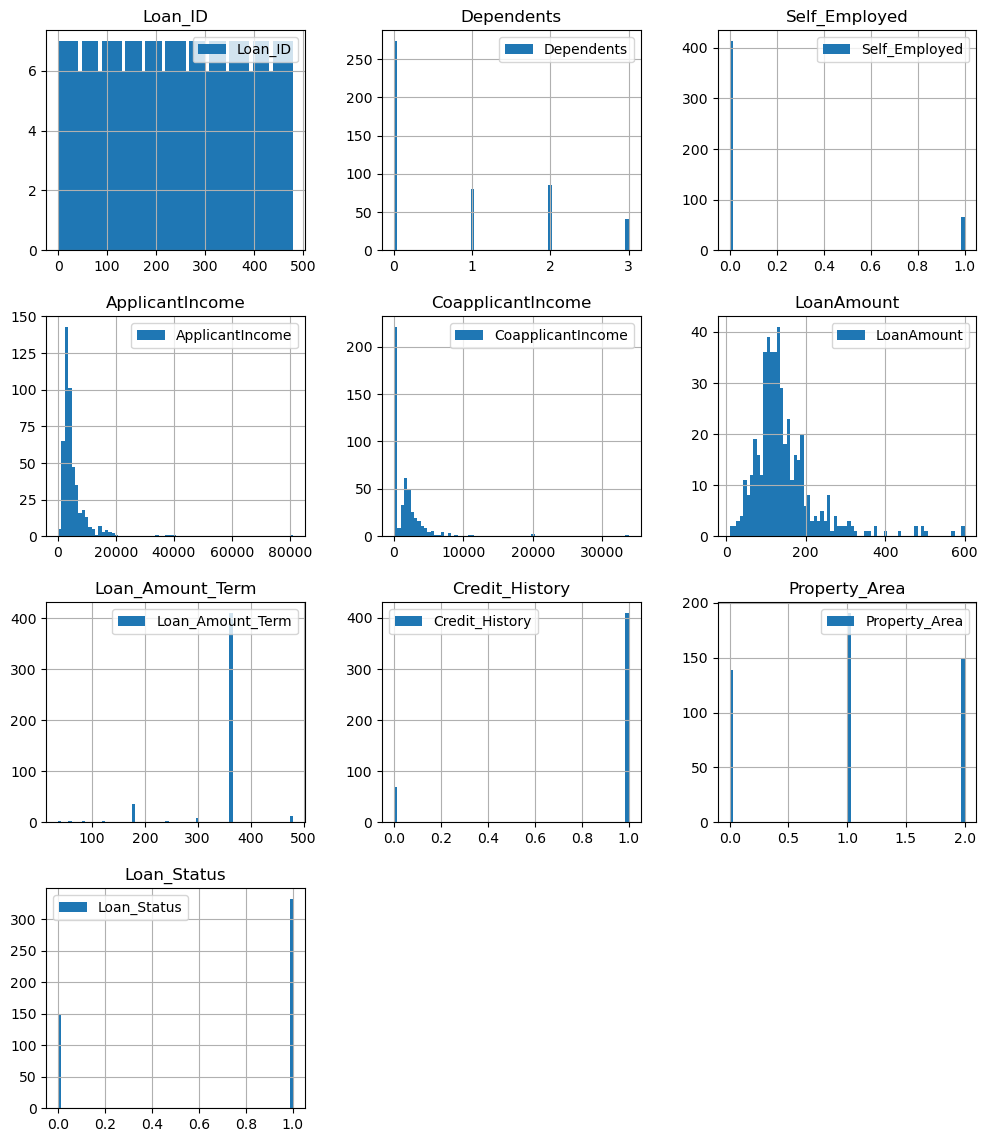

In [26]:
loan.hist(bins=70, figsize=(12,14),legend=True)
plt.show()

We can see that the data has normal distribution.

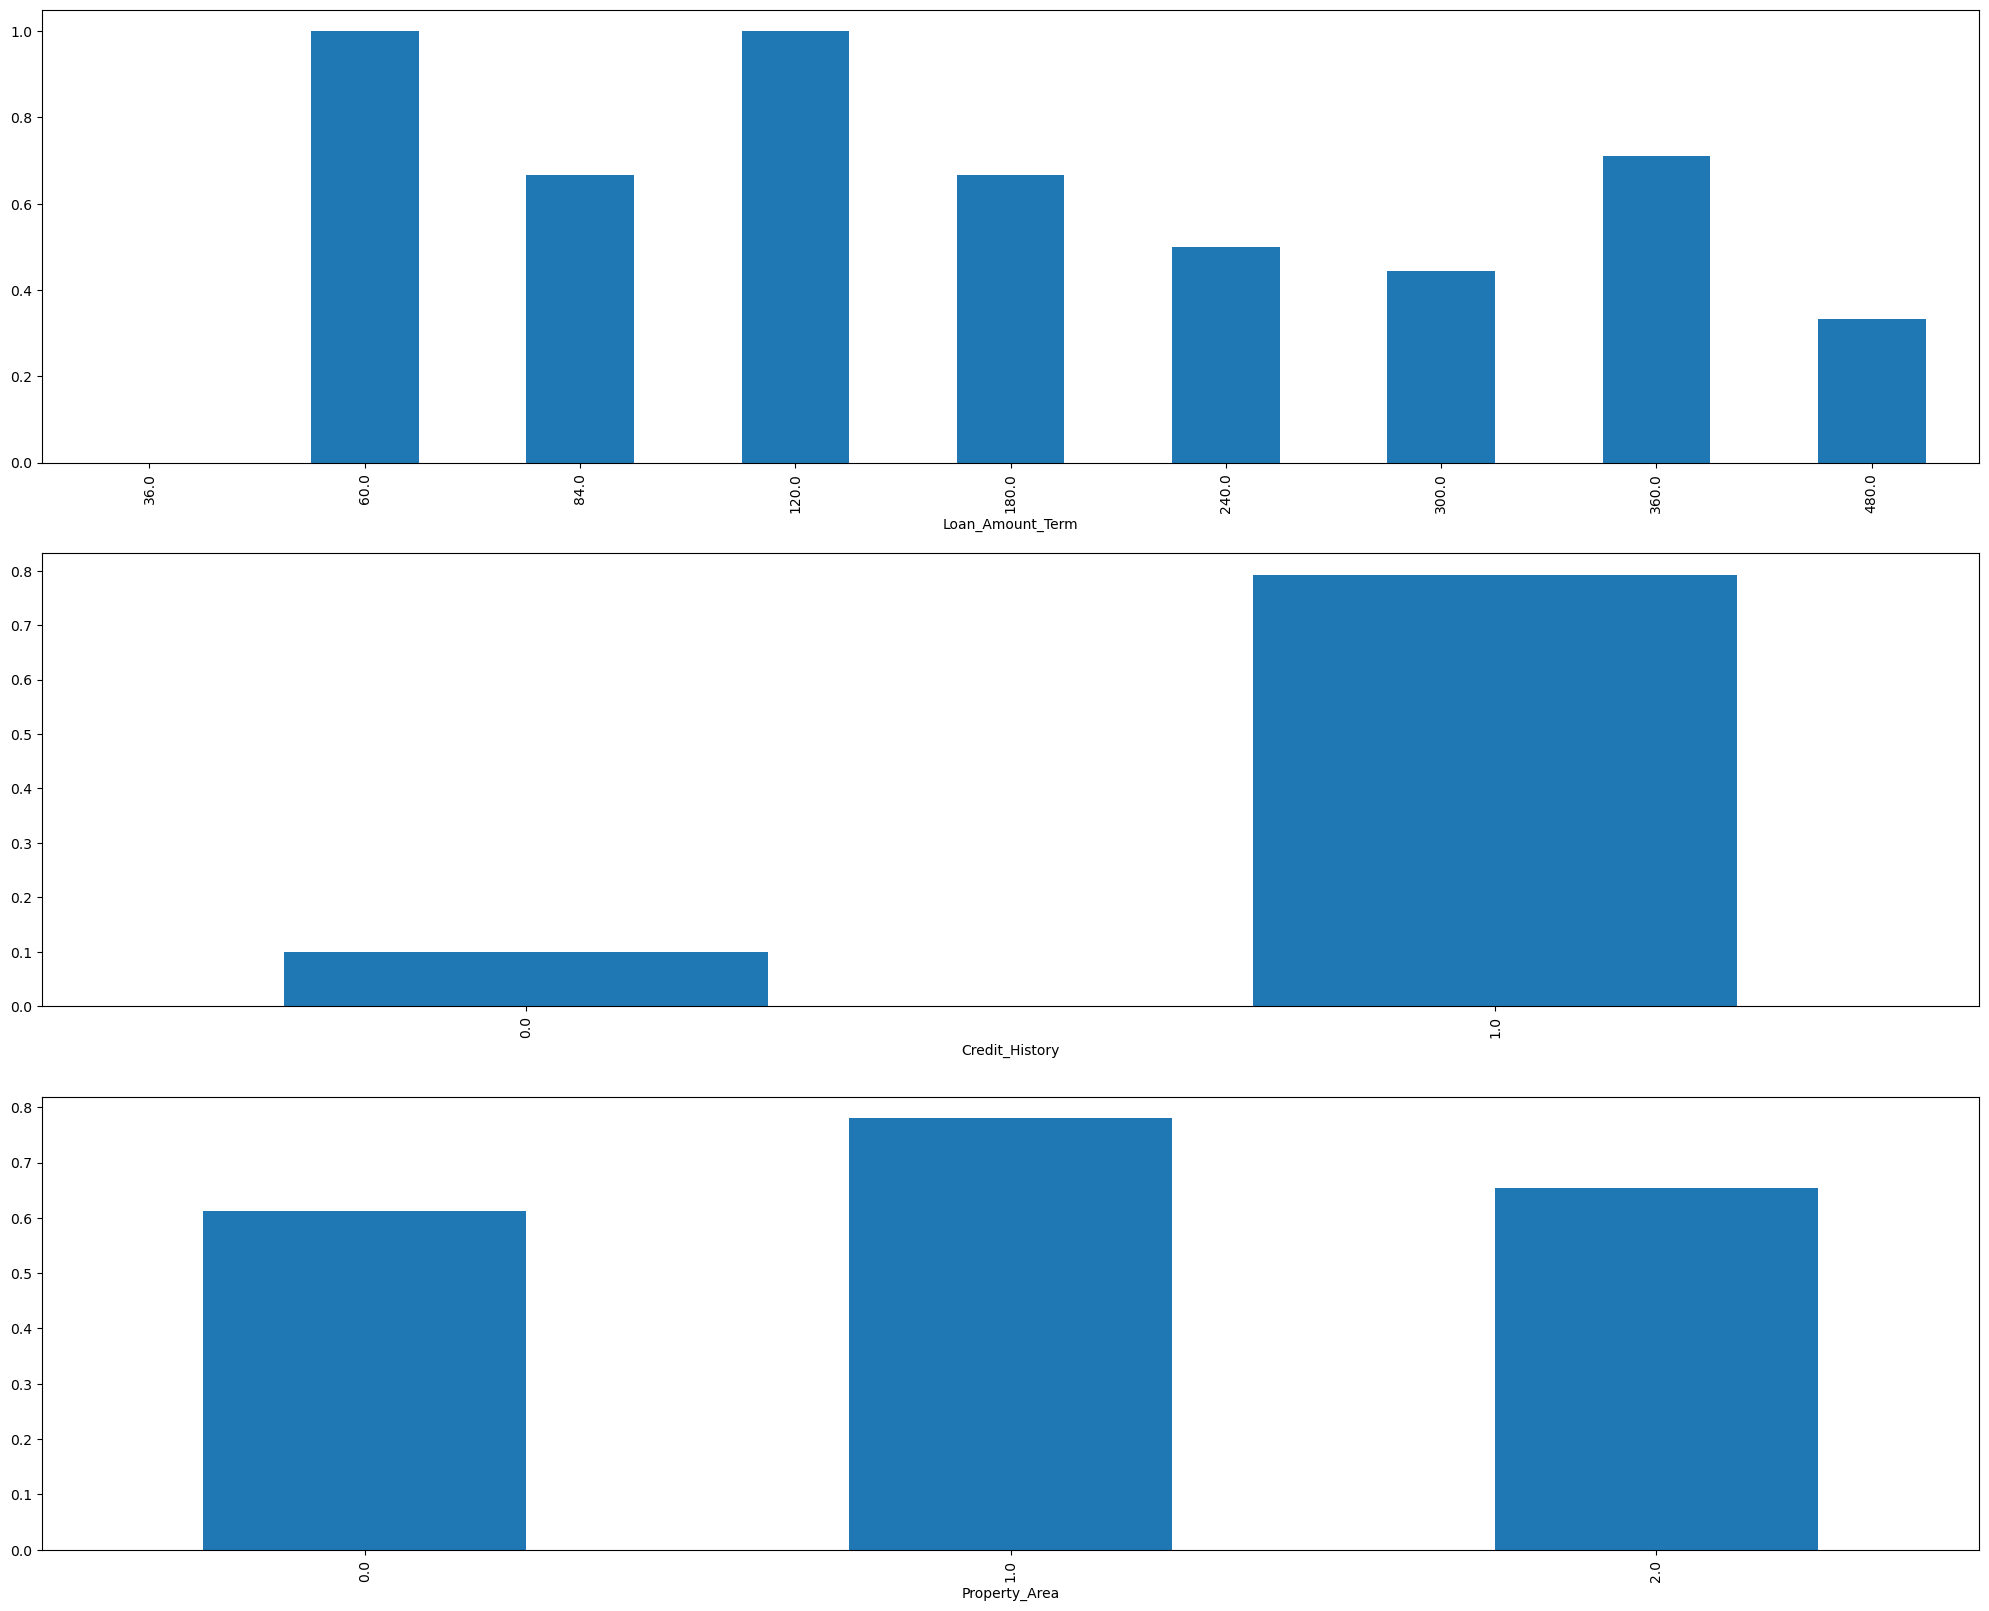

In [27]:
features=['Loan_Amount_Term','Credit_History','Property_Area']
plt.subplots(figsize=(25,20))
for i, col in enumerate(features):
    plt.subplot(3,1,i+1)
    loan.groupby(col).mean()['Loan_Status'].plot.bar()
plt.show()

loan amount60.0 and 120.0 is the highest.
1.0 credit history have high chance of loan status.
property area has high in loan status in 1.0.

Loan_ID                 Axes(0.125,0.786098;0.227941x0.0939024)
Dependents           Axes(0.398529,0.786098;0.227941x0.0939024)
Self_Employed        Axes(0.672059,0.786098;0.227941x0.0939024)
ApplicantIncome         Axes(0.125,0.673415;0.227941x0.0939024)
CoapplicantIncome    Axes(0.398529,0.673415;0.227941x0.0939024)
LoanAmount           Axes(0.672059,0.673415;0.227941x0.0939024)
Loan_Amount_Term        Axes(0.125,0.560732;0.227941x0.0939024)
Credit_History       Axes(0.398529,0.560732;0.227941x0.0939024)
Property_Area        Axes(0.672059,0.560732;0.227941x0.0939024)
Loan_Status             Axes(0.125,0.448049;0.227941x0.0939024)
dtype: object

<Figure size 1500x2000 with 0 Axes>

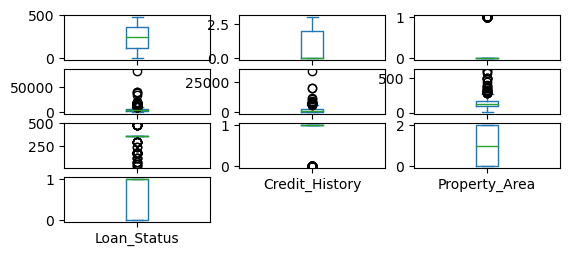

In [28]:
#checking for outliers
fig=plt.figure(figsize=(15,20))
loan.plot(kind='box',subplots=True,layout=(7,3))

This shows the present of outlier

In [29]:
#checking skewness
loan.skew()

Loan_ID              0.000000
Dependents           0.942272
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

In [30]:
x=loan.iloc[:,:-1]
y=loan.iloc[:,-1]

# Building the model

In [31]:
#seperating independent and target variables
x=loan.drop('Loan_Status',axis=1)
y=loan['Loan_Status']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (480, 9)
label dimension (480,)


In [32]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.72844612,  0.21859918, -0.3992747 , ...,  0.27554157,
         0.41319694, -1.31886834],
       [-1.72122923, -0.76203265,  2.50454133, ...,  0.27554157,
         0.41319694,  1.25977445],
       [-1.71401233, -0.76203265, -0.3992747 , ...,  0.27554157,
         0.41319694,  1.25977445],
       ...,
       [ 1.71401233,  0.21859918, -0.3992747 , ...,  0.27554157,
         0.41319694,  1.25977445],
       [ 1.72122923,  1.19923101, -0.3992747 , ...,  0.27554157,
         0.41319694,  1.25977445],
       [ 1.72844612, -0.76203265,  2.50454133, ...,  0.27554157,
        -2.42015348, -0.02954695]])

In [33]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    ra=RandomForestClassifier()
    ra.fit(x_train,y_train)
    pre=ra.predict(x_test)
    acc=accuracy_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.8611111111111112 at random state 14


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [35]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.75
[[21 17]
 [19 87]]
              precision    recall  f1-score   support

         0.0       0.53      0.55      0.54        38
         1.0       0.84      0.82      0.83       106

    accuracy                           0.75       144
   macro avg       0.68      0.69      0.68       144
weighted avg       0.75      0.75      0.75       144



the accuracy score of Decision tree classifier is 76.38%

In [36]:
# Random forest classifier
Rc=RandomForestClassifier()
Rc.fit(x_train,y_train)
preRc=Rc.predict(x_test)
print(accuracy_score(y_test,preRc))
print(confusion_matrix(y_test,preRc))
print(classification_report(y_test,preRc))

0.8680555555555556
[[ 21  17]
 [  2 104]]
              precision    recall  f1-score   support

         0.0       0.91      0.55      0.69        38
         1.0       0.86      0.98      0.92       106

    accuracy                           0.87       144
   macro avg       0.89      0.77      0.80       144
weighted avg       0.87      0.87      0.86       144



the accuracy score of Random forest is 86.80%

In [37]:
# Logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
prelg=lg.predict(x_test)
print(accuracy_score(y_test,prelg))
print(confusion_matrix(y_test,prelg))
print(classification_report(y_test,prelg))

0.8680555555555556
[[ 19  19]
 [  0 106]]
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67        38
         1.0       0.85      1.00      0.92       106

    accuracy                           0.87       144
   macro avg       0.92      0.75      0.79       144
weighted avg       0.89      0.87      0.85       144



accuracy score of logistic regression is 86.80%

In [38]:
#Support vector machine
svc=SVC()
svc.fit(x_train,y_train)
presvc=svc.predict(x_test)
print(accuracy_score(y_test,presvc))
print(confusion_matrix(y_test,presvc))
print(classification_report(y_test,presvc))

0.8680555555555556
[[ 20  18]
 [  1 105]]
              precision    recall  f1-score   support

         0.0       0.95      0.53      0.68        38
         1.0       0.85      0.99      0.92       106

    accuracy                           0.87       144
   macro avg       0.90      0.76      0.80       144
weighted avg       0.88      0.87      0.85       144



the accuracy score of svc is 86.80%

In [39]:
# Ada boost classifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
preada=ada.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.8194444444444444
[[20 18]
 [ 8 98]]
              precision    recall  f1-score   support

         0.0       0.71      0.53      0.61        38
         1.0       0.84      0.92      0.88       106

    accuracy                           0.82       144
   macro avg       0.78      0.73      0.74       144
weighted avg       0.81      0.82      0.81       144



accuracy score of adaboost is 81.94%

In [40]:
# Extra tree classifier
ex=ExtraTreesClassifier()
ex.fit(x_train,y_train)
preada=ex.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.8402777777777778
[[22 16]
 [ 7 99]]
              precision    recall  f1-score   support

         0.0       0.76      0.58      0.66        38
         1.0       0.86      0.93      0.90       106

    accuracy                           0.84       144
   macro avg       0.81      0.76      0.78       144
weighted avg       0.83      0.84      0.83       144



accuracy score of Extratree is 84.02%

# checking the cross validation

In [41]:
# Cv score for decisiontree
score= cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracu score and cross validation',accuracy_score(y_test,preddtc)-score.mean())

[0.78125    0.63541667 0.77083333 0.73958333 0.75      ]
0.7354166666666667
0.052124983346653365
difference between accuracu score and cross validation 0.014583333333333282


In [42]:
# Cv score for randomforest
score= cross_val_score(Rc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,preRc)-score.mean())

[0.80208333 0.75       0.79166667 0.88541667 0.8125    ]
0.8083333333333332
0.04399731683738098
difference between accuracy score and corss validation 0.05972222222222234


In [43]:
# Cv score for logistic regression
score= cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,prelg)-score.mean())

[0.80208333 0.78125    0.77083333 0.86458333 0.8125    ]
0.80625
0.03267580654449609
difference between accuracy score and corss validation 0.06180555555555556


In [44]:
# Cv score for support vector machine
score= cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,presvc)-score.mean())

[0.8125     0.79166667 0.78125    0.85416667 0.82291667]
0.8125
0.025515518153991428
difference between accuracy score and cross validation 0.05555555555555558


In [45]:
# Cv score for ada boost classifier
score= cross_val_score(ada,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.79166667 0.73958333 0.78125    0.85416667 0.73958333]
0.78125
0.042184284856909525
difference between accuracy score and cross validation 0.05902777777777779


In [46]:
# Cv score for Extatrees classifier
score= cross_val_score(ex,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.83333333 0.75       0.80208333 0.80208333 0.76041667]
0.7895833333333334
0.03047653924651626
difference between accuracy score and cross validation 0.050694444444444375


DecisionTree is our best model as the difference between accuracy score and cross validation score is least

# Setting paramaters

In [47]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [57]:
#setting parameters
para={'min_samples_split':[0.8,0.9,1,1.1,1.2,1.3,1.4],
      'criterion':['gini','entropy'],
     'random_state':[None]}
dtc_cv=GridSearchCV(dtc,para,cv=10)
dtc_cv.fit(x_train,y_train)
print(dtc_cv.best_params_)

{'criterion': 'gini', 'min_samples_split': 0.9, 'random_state': None}


In [59]:
dtc_new=DecisionTreeClassifier(min_samples_split=0.9,criterion='gini',random_state=None)
dtc_new.fit(x_train,y_train)
y_pred_new=svc_new.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred_new))
print(acc*100)

0.8680555555555556
77.08333333333334


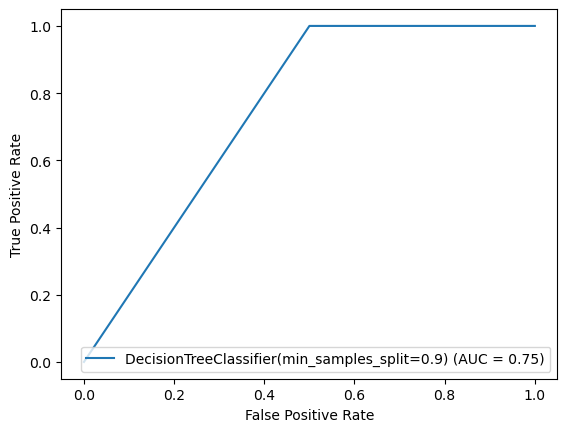

In [60]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_new)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=dtc_new)
display.plot()

The accuracy score of Decisison tree is 75%
Min_samples_split is 0.9

In [61]:
#Saving the model
import joblib
import pickle
filename="Loan application.pkl"
pickle.dump(svc_new,open(filename,'wb'))

In [62]:
#predicting the save model
model=pickle.load(open('Loan application.pkl','rb'))

In [63]:
result=model.score(x_test,y_test)
print(result*100)

86.80555555555556


In [64]:
con=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
predicted,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
orginal,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
